In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [92]:
Titanic = pd.DataFrame(pd.read_csv('/content/train.csv'))
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [94]:
Titanic.shape

(891, 12)

In [95]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

There are a total of 891 passengers and 12 datasets in the document. The full description of the datasets are listed below.


Description of dataset

Survived: Survived (1) or died (0)

Pclass: Passenger’s class

Name: Passenger’s name

Sex:Passenger’s sex

Age: Passenger’s age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [96]:
V= Titanic.isnull().sum()
V

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

About 20 % of the Age parameter value was not provided. However, this is a very important parameter for survivors' study. Therefore, this parameter cannot be removed from the datasets.

Two values of the Embarked parameter were not provided, which should be relatively harmless.

On the other hand, approximate 77% of the Cabin parameter values are missing and this parameter was removed from our dataset.


In [97]:
drop_col = V[V > (35/100*Titanic.shape[0])]
drop_col

Cabin    687
dtype: int64

In [98]:
drop_col.index

Index(['Cabin'], dtype='object')

In [73]:
Titanic.drop(drop_col.index, axis = 1, inplace=True)
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [74]:
Titanic.fillna(Titanic.mean(), inplace=True)
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [75]:
Titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [76]:
Titanic['Embarked'].fillna('S', inplace=True)
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [99]:
Titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From the table, the passengers who purchase higher priced fare and are in higher class cabin have higher survival chance.

The age has negative correlation against the survival chance.

In [100]:
Titanic.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


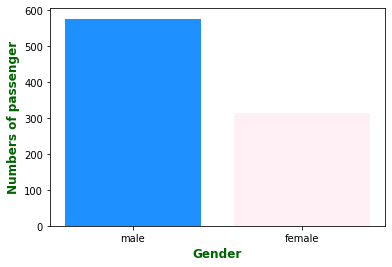

In [101]:
sb.countplot(data = Titanic, x = 'Sex')
N = [577, 314]
S = ('Male', 'Female')
x_pos = np.arange(len(S))

# Create bars
plt.bar(x_pos, N, color=('dodgerblue','lavenderblush'))
plt.xlabel('Gender', color='darkgreen',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger',color='darkgreen',fontweight='bold', fontsize = 12)

plt.show()

Number of male passengers: 577

Number of female passengers: 314

In [102]:
M = 577/(577+314) # M = male
print (M)
F = 314/(577+314) # F= female
print (F)

0.6475869809203143
0.35241301907968575


In [103]:
Titanic.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Sex    Survived                                  ...                               
female 0                  81      81    81   64  ...      81    81      6        81
       1                 233     233   233  197  ...     233   233     91       231
male   0                 468     468   468  360  ...     468   468     62       468
       1                 109     109   109   93  ...     109   109     45       109

[4 rows x 10 columns]

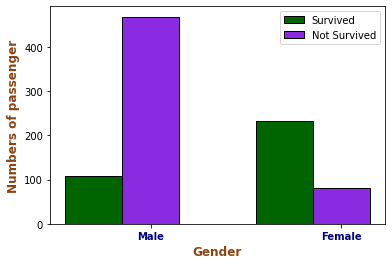

In [105]:
S = [109, 233] # S = survived
D = [468, 81] # D = not survived
 
barwidth= 0.3

r1 = np.arange(len(S))
r2 = [x + barwidth for x in r1]
 
plt.bar(r1, S, width = barwidth, color = 'darkgreen', edgecolor = 'black',label='Survived')
 
plt.bar(r2, D, width = barwidth, color = 'blueviolet', edgecolor = 'black', label='Not Survived')
 
plt.xticks([r + barwidth for r in range(len(S))], ['Male', 'Female'], color = 'navy', fontweight='bold')
plt.xlabel('Gender', color = 'saddlebrown',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger', color = 'saddlebrown', fontweight='bold',fontsize = 12)
plt.legend()
 
plt.show()

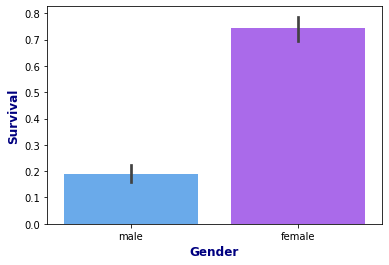

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [106]:
sb.barplot(x="Sex", y="Survived", data=Titanic, palette = ('cool'))
plt.xlabel('Gender', color='navy',fontweight='bold', fontsize = 12)
plt.ylabel('Survival', color='navy',fontweight='bold', fontsize = 12)
plt.show()
Titanic.groupby(['Sex'])['Survived'].mean()*100

Although the passengers in the titanic was made up of 68% male,the survival of male passenger is very low which possibly indicate the rescue lifeboats were prioritised for women.

In [107]:
Titanic.groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


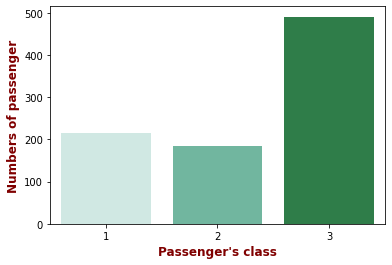

In [108]:
sb.countplot(data = Titanic, x = 'Pclass', palette = ('BuGn'))
plt.xlabel('Passenger\'s class', color='maroon',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger',color='maroon',fontweight='bold', fontsize = 12)
plt.show()

In [109]:
Titanic.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  ...  Ticket  Fare  Cabin  Embarked
Pclass Survived                               ...                               
1      0                  80    80   80   64  ...      80    80     59        80
       1                 136   136  136  122  ...     136   136    117       134
2      0                  97    97   97   90  ...      97    97      3        97
       1                  87    87   87   83  ...      87    87     13        87
3      0                 372   372  372  270  ...     372   372      6       372
       1                 119   119  119   85  ...     119   119      6       119

[6 rows x 10 columns]

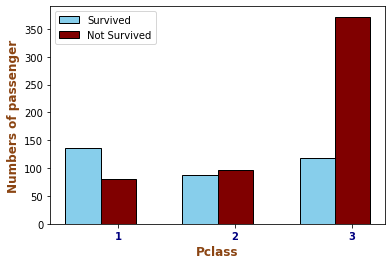

In [110]:
S = [136, 87, 119] # S = survived
D = [80, 97, 372] # D = not survived
 
barwidth= 0.3

r1 = np.arange(len(S))
r2 = [x + barwidth for x in r1]
 
plt.bar(r1, S, width = barwidth, color = 'skyblue', edgecolor = 'black',label='Survived')
 
plt.bar(r2, D, width = barwidth, color = 'maroon', edgecolor = 'black', label='Not Survived')
 
plt.xticks([r + barwidth for r in range(len(S))], ['1','2', '3'], color = 'navy', fontweight='bold')
plt.xlabel('Pclass', color = 'saddlebrown',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger', color = 'saddlebrown', fontweight='bold',fontsize = 12)
plt.legend()
 
plt.show()

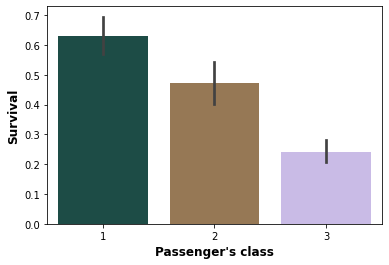

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [112]:
sb.barplot(x="Pclass", y="Survived", data=Titanic, palette = ('cubehelix'))
plt.xlabel('Passenger\'s class', fontweight='bold', fontsize = 12)
plt.ylabel("Survival", fontweight='bold', fontsize = 12)
plt.show()
Titanic.groupby(['Pclass'])['Survived'].mean()*100

From the table, the survival of passengers who are in first class cabin is the highest which indicate the rescue lifeboats were prioritised for the passengers of the first class cabin.

In [113]:
Titanic.groupby(['Sex','Pclass','Survived']).count()

PassengerId  Name  Age  ...  Fare  Cabin  Embarked
Sex    Pclass Survived                          ...                       
female 1      0                   3     3    3  ...     3      3         3
              1                  91    91   82  ...    91     78        89
       2      0                   6     6    6  ...     6      1         6
              1                  70    70   68  ...    70      9        70
       3      0                  72    72   55  ...    72      2        72
              1                  72    72   47  ...    72      4        72
male   1      0                  77    77   61  ...    77     56        77
              1                  45    45   40  ...    45     39        45
       2      0                  91    91   84  ...    91      2        91
              1                  17    17   15  ...    17      4        17
       3      0                 300   300  215  ...   300      4       300
              1                  47    47   38  ...    47      2        47

[12 rows x 9 columns]

In [114]:
F1S = 91/(91+3)*100 # F1S = female in first class cabin who survived
print (F1S)

F2S= 70/(70+6)*100  #F2S = female in second class cabin who survived
print (F2S)

F3S = 72/(72+72)*100 #F3S = female in third class cabin who survived
print (F3S)

M1S = 45/(77+45)*100 #M1S = male in first class cabin who survived
print (M1S)

M2S= 17/(91+17)*100 #M2S = male in second class cabin who survived
print (M2S)

M3S = 47/(300+47)*100 #M3S = male in third class cabin who survived
print (M3S)


96.80851063829788
92.10526315789474
50.0
36.885245901639344
15.74074074074074
13.544668587896252


The survival of female passenger who is in first, second, third class cabin are 96.8%, 92.1%, 50.0%. The survival chance of male passenger who is in first, second, third class cabin are 36.9%, 15.7%, 13.5%.

In [115]:
Titanic['FamilySize']=Titanic['SibSp']+Titanic['Parch']
Titanic.drop(['SibSp','Parch'], axis = 1, inplace=True)
Titanic.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000


In [116]:
Titanic['Alone']= [0 if Titanic['FamilySize'][i]>0 else 1 for i in Titanic.index]
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


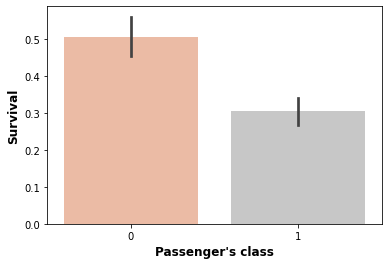

Alone
0    50.564972
1    30.353818
Name: Survived, dtype: float64

In [118]:
sb.barplot(x="Alone", y="Survived", data=Titanic, palette = ('RdGy'))
plt.xlabel('Passenger\'s class', fontweight='bold', fontsize = 12)
plt.ylabel("Survival", fontweight='bold', fontsize = 12)
plt.show()
Titanic.groupby(['Alone'])['Survived'].mean()*100

In [119]:
Titanic[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [120]:
Titanic.groupby(['Alone','Pclass','Survived']).count()

PassengerId  Name  Sex  ...  Cabin  Embarked  FamilySize
Alone Pclass Survived                          ...                             
0     1      0                  29    29   29  ...     26        29          29
             1                  78    78   78  ...     72        78          78
      2      0                  29    29   29  ...      1        29          29
             1                  51    51   51  ...      4        51          51
      3      0                 117   117  117  ...      2       117         117
             1                  50    50   50  ...      5        50          50
1     1      0                  51    51   51  ...     33        51          51
             1                  58    58   58  ...     45        56          58
      2      0                  68    68   68  ...      2        68          68
             1                  36    36   36  ...      9        36          36
      3      0                 255   255  255  ...      4       255         255
             1                  69    69   69  ...      1        69          69

[12 rows x 9 columns]

From the table, the survival of passenger who traveled alone is lower compared with traveled with family which could possibly due to the passengers who traveled alone were from third class cabin. 

In [121]:
print (Titanic['Age'].max())
print (Titanic['Age'].min())

80.0
0.42


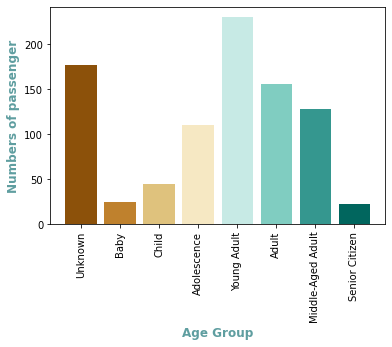

In [123]:
A = [177, 24, 45, 110, 230, 155, 128, 22]
B = ('Unknown', 'Baby', 'Child', 'Adolescence', 'Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior Citizen')
x_pos = np.arange(len(A))

plt.bar(B, A, color=('#8c510a','#bf812d','#dfc27d','#f6e8c3', '#c7eae5','#80cdc1','#35978f', '#01665e'))
plt.xlabel('Age Group', color='cadetblue',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger',color='cadetblue',fontweight='bold', fontsize = 12)
plt.xticks(rotation=90)

plt.show()

In [126]:
Titanic.groupby(['AgeGroup','Survived']).count()

PassengerId  Pclass  ...  FamilySize  Alone
AgeGroup          Survived                       ...                   
Unknown           0                 125     125  ...         125    125
                  1                  52      52  ...          52     52
Baby              0                   9       9  ...           9      9
                  1                  15      15  ...          15     15
Child             0                  20      20  ...          20     20
                  1                  25      25  ...          25     25
Adolescence       0                  68      68  ...          68     68
                  1                  42      42  ...          42     42
Young Adult       0                 146     146  ...         146    146
                  1                  84      84  ...          84     84
Adult             0                  86      86  ...          86     86
                  1                  69      69  ...          69     69
Middle-Aged Adult 0                  78      78  ...          78     78
                  1                  50      50  ...          50     50
Senior            0                  17      17  ...          17     17
                  1                   5       5  ...           5      5

[16 rows x 11 columns]

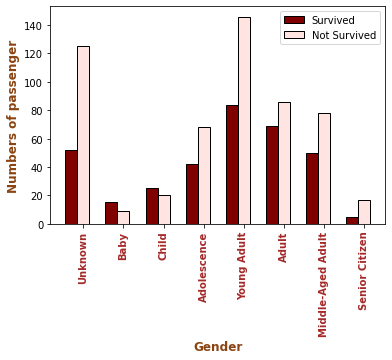

In [127]:
S = [52, 15, 25, 42, 84, 69, 50, 5 ] # S = survived
D = [125, 9, 20, 68, 146, 86, 78, 17] # D = not survived
 
barwidth= 0.3

r1 = np.arange(len(S))
r2 = [x + barwidth for x in r1]
 
plt.bar(r1, S, width = barwidth, color = 'maroon', edgecolor = 'black',label='Survived')
 
plt.bar(r2, D, width = barwidth, color = 'mistyrose', edgecolor = 'black', label='Not Survived')
 
plt.xticks([r + barwidth for r in range(len(S))], ['Unknown', 'Baby','Child','Adolescence', 'Young Adult', 'Adult','Middle-Aged Adult','Senior Citizen'], color = 'brown', fontweight='bold', rotation=90)
plt.xlabel('Gender', color = 'saddlebrown',fontweight='bold', fontsize = 12)
plt.ylabel('Numbers of passenger', color = 'saddlebrown', fontweight='bold',fontsize = 12)
plt.legend()

plt.show()

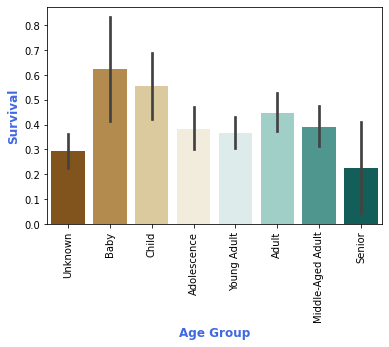

In [125]:
Titanic["Age"] = Titanic["Age"].fillna(-0.5)

bins = [-1, 0, 2, 12, 20, 30, 40, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Adolescence', 'Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']
Titanic['AgeGroup'] = pd.cut(Titanic["Age"], bins, labels = labels)

sb.barplot(x="AgeGroup", y="Survived", data=Titanic, palette =("BrBG"))
plt.xlabel('Age Group', color='royalblue',fontweight='bold', fontsize = 12)
plt.ylabel('Survival', color='royalblue',fontweight='bold', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

Based on the table, the babies and children have the highest survival whereas the survival senior citizen has the lowest survival.

In [133]:
Titanic.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,Alone,AgeGroup
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,69,168,168,168
Q,77,77,77,77,77,77,77,77,4,77,77,77
S,644,644,644,644,644,644,644,644,129,644,644,644


In [130]:
Titanic.groupby(['Embarked','Survived']).count()

PassengerId  Pclass  Name  ...  FamilySize  Alone  AgeGroup
Embarked Survived                             ...                             
C        0                  75      75    75  ...          75     75        75
         1                  93      93    93  ...          93     93        93
Q        0                  47      47    47  ...          47     47        47
         1                  30      30    30  ...          30     30        30
S        0                 427     427   427  ...         427    427       427
         1                 217     217   217  ...         217    217       217

[6 rows x 11 columns]

In [131]:
Titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

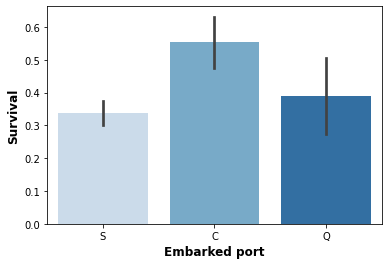

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [134]:
Titanic.groupby(['Embarked'])['Survived'].mean()
sb.barplot(x="Embarked", y="Survived", data=Titanic, palette = ('Blues'))
plt.xlabel('Embarked port',fontweight='bold', fontsize = 12)
plt.ylabel('Survival', fontweight='bold', fontsize = 12)
plt.show()
Titanic.groupby(['Embarked'])['Survived'].mean()*100

Majority of passengers embarked at Southampton but the survival of passengers who embarked at Southampton is the lowest.

**Conclusion**

1. Although the passengers in the titanic was made up of 68% male,the survival of male passenger is very low which possibly indicate the rescue lifeboats were prioritised for women.

2. The survival of passengers who are in first class cabin is the highest which indicate the rescue lifeboats were prioritised for the passengers of the first class cabin.

3. The survival of female passenger who is in first, second, third class cabin are 96.8%, 92.1%, 50.0%. The survival chance of male passenger who is in first, second, third class cabin are 36.9%, 15.7%, 13.5%.

4. The survival of passenger who traveled alone is lower compared with traveled with family which could possibly due to the passengers who traveled alone were from third class cabin.

5. The babies and children have the highest survival whereas the survival senior citizen has the lowest survival.

6. Majority of passengers embarked at Southampton but the survival of passengers who embarked at Southampton is the lowest.




